#PCA

Principal Component Analysis,  is a powerful technique for Dimensionality Reduction and Data visualisation

WE use eigan values and eigan vectors to compute PC's.

eigan vectors gives the direction of vectors in the new space and their values determine their magnitude

##PCA implementation in python

Here's a 4 step process to do PCA:

- Standardize the data (mean=0 | var 1)
- Compute the covariance matrix.
- Find its eigenvalues & eigenvectors.
- Sort eigenvectors by decreasing eigenvalues.


In [1]:
import numpy as np

In [7]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None


  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    cov = np.cov(X, rowvar=False)

    eiganvalues, eiganvectors = np.linalg.eigh(cov)

    # Sort eigan values in descending order
    idx = np.argsort(eiganvalues)[::-1]
    eiganvalues = eiganvalues[idx]
    eiganvectors = eiganvectors[:, idx]
    print("Eiganvalues: ", eiganvalues)
    print("Eiganvectors: ", eiganvectors)
    
    # store first n components eiganvectors as principle components
    self.components = eiganvectors[:self.n_components]

  def transform(self, X):
    X = X - self.mean
    X_transformed = np.dot(X, self.components.T)
    return X_transformed

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_data = load_wine()
X = wine_data.data
y = wine_data.target

print(X.shape)
print(y.shape)

(178, 13)
(178,)


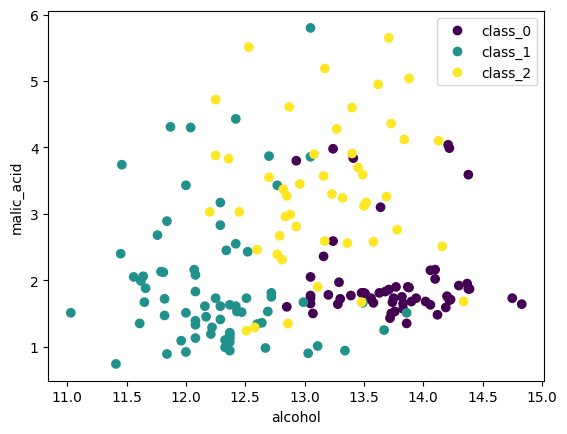

In [9]:
plot = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(wine_data.target_names))
plt.xlabel(wine_data.feature_names[0])
plt.ylabel(wine_data.feature_names[1])
plt.show()

##Apply PCA to the dataset

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
print(X_transformed.shape)

Eiganvalues:  [9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 7.17026032e-02 3.75759789e-02 2.10723661e-02
 8.20370314e-03]
Eiganvectors:  [[ 1.65926472e-03  1.20340617e-03 -1.68738094e-02  1.41446778e-01
   2.03369773e-02  1.94120104e-01 -9.23280337e-01 -2.84820658e-01
   8.66006124e-02 -2.24499994e-03 -1.49715080e-02 -1.56514071e-02
  -8.02924535e-03]
 [-6.81015556e-04  2.15498184e-03 -1.22003373e-01  1.60389543e-01
  -6.12883454e-01  7.42472963e-01  1.50109941e-01  6.46744678e-02
   1.56621385e-02 -1.85093501e-02 -2.31876506e-02  6.72955455e-02
   1.10903923e-02]
 [ 1.94905742e-04  4.59369254e-03 -5.19874304e-02 -9.77280992e-03
   2.01755752e-02  4.17529118e-02 -4.50095493e-02  1.49339532e-01
   7.36498524e-02 -8.67996529e-02  9.54010643e-01 -1.32063034e-01
   1.73685673e-01]
 [-4.67130058e-03  2.64503930e-02 -9.38593003e-01 -3.30965260e-01
   6.43523403e-02 -2.40653026e-02 -3.15265835e-02 -1.5

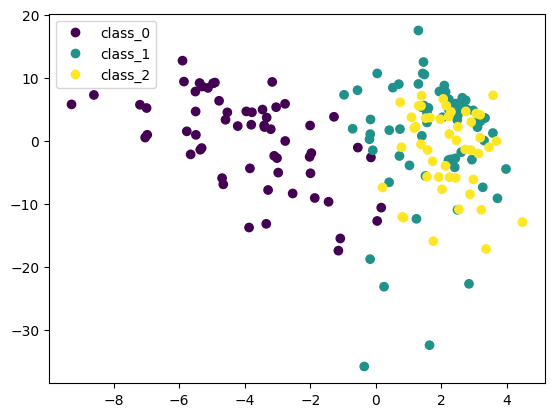

In [11]:
plot = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(wine_data.target_names))
plt.show()

we can see some distinction between the classes